# Lab 2 Daniel Claesson

Links to material I found useful in this lab:
- [Geeks for Geeks, working with csv files](https://www.geeksforgeeks.org/working-csv-files-python/)
- [Pyhton doc, reading and writing files](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)
- [Programiz, python list count](https://www.programiz.com/python-programming/methods/list/count)
- [Stackoverflow, sort list based on another list](https://stackoverflow.com/questions/6618515/sorting-list-according-to-corresponding-values-from-a-parallel-list)
- [nkmk.me, How to return multiple values from function](https://note.nkmk.me/en/python-function-return-multiple-values/)


**read_traingdata** funktionen:
- Läser in trainingdatan direkt från .txt-filen, baserat på filepath input
- Gör om strings till floats, tar bort white_spaces etc.
- Returnerar en list of lists: [[width],[height],[label]]

In [1]:
import matplotlib.pyplot as plt
import math

def read_trainingdata(filepath):
    """Returns list of list with width, heigh and label values."""
    file = open(filepath)
    content = []
    width = []
    height = []
    label = []

    for times in range(151):
        content.append(file.readline())

    content2 = []

    for item in content:
        content2.append(item.split(','))

    del content2[0]

    for item in content2:
        item[0] = float(item[0])
        item[1] = item[1].strip()
        item[1] = float(item[1])
        item[2] = item[2].strip()
        item[2] = item[2].replace('\n','')
        item[2] = int(item[2])
        width.append(item[0])
        height.append(item[1])
        label.append(item[2])

    returnlist = []
    returnlist.append(width)
    returnlist.append(height)
    returnlist.append(label)

    return returnlist

TD = read_trainingdata("..\Data\datapoints.txt")

**plot_trainingdata** funktionen:
- plottar träningsdatan för varje sample

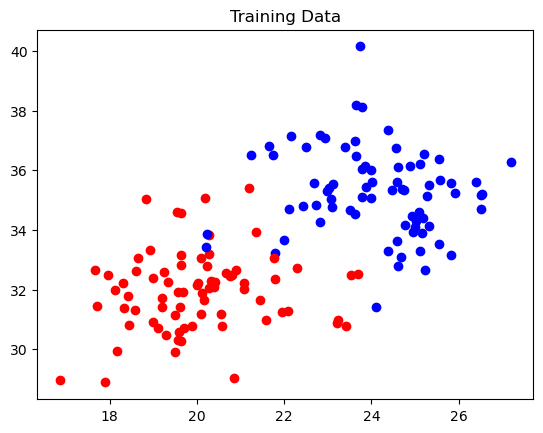

In [2]:
def plot_trainingdata(width, height, label=None):
    """Plots all training data"""
    for idx in range(len(label)):
        if label[idx] == 1:
            plt.scatter(width[idx], height[idx], color = 'blue')
        elif label[idx] == 0:
            plt.scatter(width[idx], height[idx], color = 'red')
        else: break
    
    plt.title("Training Data")

plot_trainingdata(TD[0], TD[1], TD[2])

**read_sampledata* funktionen:
- läser in sample datan från filen

In [ ]:
def read_sampledata(filepath):
    """to be done"""

**Classifier** funktionen:
- tar en sample punkts coordinater som inputargument
- beräknar distansen mellan sample punkt och träningsdatans alla punkter
- identifirerar närmsta träningsdata punkt
- klassificerar Pichu / Pikatchu, beroende på närmsta punkts "label"
- Returnerar en sträng med resultatet

In [26]:
def classifier(coordinates):
    """Use nearest neighbour classification to identify
    between Pikachu and Pichu, based on sample data coordinates.
    Coordinates to be given on format [x1, y1], a list."""
    TD_width = TD[0] # x
    TD_height = TD[1] # y
    TD_label = TD[2] # label
    dist = []
    for idx in range(len(TD_label)):
        d = math.sqrt((TD_width[idx] - coordinates[0])**2 + (TD_height[idx] - coordinates[1])**2)
        dist.append(d)
    
    #finding index of the minimum distance, in "dist" list
    idx_min_dist = dist.index(min(dist))

    if TD_label[idx_min_dist] == 0:
        pokemon = "Pichu"
    elif TD_label[idx_min_dist] == 1:
        pokemon = "Pikachu"
    
    return pokemon, dist # https://note.nkmk.me/en/python-function-return-multiple-values/
        
pokemon, TD_dist = classifier([22.1, 34.1])

print(pokemon)
print(TD_dist)
print(len(TD_dist))    

Pikachu
[2.863887146011727, 2.8226726328579033, 5.128648866510755, 0.9425154473329383, 3.9616803118468753, 3.3270283969414813, 2.910494162327709, 4.346797914607481, 3.6006053899171513, 2.1409029979048246, 3.990633837544592, 2.8467342860656735, 3.2112901746802405, 0.7356414589289225, 2.503484779215438, 4.628424947267023, 0.9665533906262109, 3.8454955625518927, 2.2762302691930723, 6.690328248899948, 3.961325917167389, 4.564749046039261, 4.571901787102698, 2.967248839768492, 1.5041610547291273, 4.43556544535449, 3.1668447932844708, 3.598509763051595, 3.9412039201784532, 5.7306895149663095, 4.521042092994801, 3.090738091680356, 4.484493984979912, 2.880556475852964, 1.6043763017337282, 2.033849209630682, 4.651584759628447, 2.070021659565525, 3.5283571101305293, 2.6393741587224437, 2.224438242124345, 4.550083590478143, 3.8051284325456547, 2.122333724969398, 1.9694451130046664, 3.352024085079663, 2.2517339393750717, 1.8943661860977283, 2.9117085741116338, 2.7545143251843913, 3.805617309837781

**classifier10** funktionen baserar analysen på de 10 närmaste grannarna.

In [51]:
def classifier10(coordinates):
    """Use nearest neighbour classification to identify
    between Pikachu and Pichu, based on sample data coordinates.
    Coordinates to be given on format [x1, y1], a list.
    Function uses 10 nearest neighbours for determination."""
    TD_width = TD[0] # x
    TD_height = TD[1] # y
    TD_label = TD[2] # label
    dist = [] #
    for idx in range(len(TD_label)):
        d = math.sqrt((TD_width[idx] - coordinates[0])**2 + (TD_height[idx] - coordinates[1])**2)
        dist.append(d)
    
    # skapar sorterad lista för labels, baserad på dist-listan.

    #TD_label_sorted_10 = [[idx for idx in TD_label] for element in TD_label.sort()]
    TD_label_sorted_10 = [x[1] for x in sorted(zip(dist, TD_label))] # https://stackoverflow.com/questions/6618515/sorting-list-according-to-corresponding-values-from-a-parallel-list

    print(TD_label_sorted_10[0:10])
   
    if TD_label_sorted_10[0:10].count(0) > 5:
        pokemon = "Pichu"
    elif TD_label_sorted_10[0:10].count(1) > 5:
        pokemon = "Pikachu"
    else: pokemon = "it's a draw!"
    
    return pokemon, dist
        
pokemon, TD_dist = classifier10([22.1, 34.1])

print(pokemon)
#print(TD_dist)
#print(len(TD_dist))    

[1, 1, 1, 1, 0, 1, 1, 0, 1, 1]
Pikachu


**evaluation** funktionen:
- tar lista med flertalet coordinater som inputargument
- för varje koordinat anropas classifier funktionen
- classifier funktionen output används för att skriva ut resultatet

In [50]:
def evaluation(data):
    """Evaluates multiple coordinates, arguments as a list.
    Returns classification for each of the coordinates."""
    res_str=""
    for element in data:
        pokemon , TD_dist = classifier(element)
        res_str = res_str + (f"Sample with (width, heigt): {element[0]}, {element[1]} classified as {pokemon}.\n")
    
    print(res_str)


data = evaluation([[25, 32],[24.2, 31.5],[22, 34],[20.5, 34]])

Sample with (width, heigt): 25, 32 classified as Pikachu.
Sample with (width, heigt): 24.2, 31.5 classified as Pikachu.
Sample with (width, heigt): 22, 34 classified as Pikachu.
Sample with (width, heigt): 20.5, 34 classified as Pichu.



In [13]:
def evaluation(data):
    """Evaluates multiple coordinates, arguments as a list.
    Returns classification for each of the coordinates."""
    pokemon , TD_dist = classifier(data)
    print(f"Sample with (width, heigt): {data[0]},{data[1]} classified as {pokemon}.\n")
    
    
data = [[25, 32]]

In [20]:
# försökte med cvs modulen, men det är ju en textfil.... Överger denna approachen tills vidare.
import csv
fields = []
rows = []
column = []

with open("..\Data\datapoints.csv") as csvfile:
    content = csv.reader(csvfile)
    fields = next(content)
    for row in content:
        rows.append(row)
    #print("total nbr of rows: "%(content.line_num))
    for column in content:
        column.append(column)

In [ ]:
for idx in data:
    print(data)
    

data = [[25, 32],[24.2, 31.5],[22, 34],[20.5, 34]]

Hur man kan sortera en lista baserat på en annan lista med list comprehension.

In [38]:
l1 = [1, 4, 2, 7, 3, 6, 5]
l2 = [10, 11, 12, 13, 14, 15, 16]

l3 = [x[1] for x in sorted(zip(l1, l2))]
print(l3) # [10, 12, 14, 11, 16, 14, 13]
l4 = [x for x in sorted(zip(l1, l2))]

print(l4)

sum = sum(l1)
print(sum)


[10, 12, 14, 11, 16, 15, 13]
[(1, 10), (2, 12), (3, 14), (4, 11), (5, 16), (6, 15), (7, 13)]
28


In [43]:
#l5=[1, 1, 1, 1, 0, 1, 1, 0, 1, 1]
#print(sum(l5))

l6 = [1, 1, 0]
print(sum(l6))


TypeError: 'int' object is not callable